In [1]:
# Import modules
import geopandas as gpd
from rasterio.plot import show, show_hist
import geopandas as gpd
from glob import glob
from datetime import datetime 

In [2]:
# Get the current working directory
#cwd = os.getcwd()
cwd = 'c:/Users/rensw/OneDrive - Universiteit Utrecht/GIMA/Thesis - Buitenland/Thesis/Data/Raw_data/Administrative_Boundaries'

# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: c:/Users/rensw/OneDrive - Universiteit Utrecht/GIMA/Thesis - Buitenland/Thesis/Data/Raw_data/Administrative_Boundaries


In [3]:
# read GML-files Administrative Boundaries 
gml_country = gpd.read_file(cwd + '/raw/au_AdministrativeUnit_1stOrder0.gml')
gml_autonomouscommunity = gpd.read_file(cwd + '/raw/au_AdministrativeUnit_2ndOrder0.gml')
gml_province = gpd.read_file(cwd + '/raw/au_AdministrativeUnit_3rdOrder0.gml')
gml_municipality = gpd.read_file(cwd + '/raw/au_AdministrativeUnit_4thOrder0.gml')

# save GML-files as shapefiles
gml_country.to_file(cwd + '/interim/AdministrativeBoundaries_Country_InterimData_14112022.shp')
gml_autonomouscommunity.to_file(cwd + '/interim/AdministrativeBoundaries_AutonomousCommunity_InterimData_14112022.shp')
gml_province.to_file(cwd + '/interim/AdministrativeBoundaries_Province_InterimData_14112022.shp')
gml_municipality.to_file(cwd + '/interim/AdministrativeBoundaries_Municipality_InterimData_14112022.shp')



C:\Users\rensw\AppData\Local\Temp\ipykernel_8364\1096347728.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gml_country.to_file(cwd + '/interim/AdministrativeBoundaries_Country_InterimData_14112022.shp')
C:\Users\rensw\AppData\Local\Temp\ipykernel_8364\1096347728.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gml_autonomouscommunity.to_file(cwd + '/interim/AdministrativeBoundaries_AutonomousCommunity_InterimData_14112022.shp')
C:\Users\rensw\AppData\Local\Temp\ipykernel_8364\1096347728.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gml_province.to_file(cwd + '/interim/AdministrativeBoundaries_Province_InterimData_14112022.shp')
C:\Users\rensw\AppData\Local\Temp\ipykernel_8364\1096347728.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gml_municipa

In [3]:
# read Shapefiles
shp_country = gpd.read_file(cwd + '/interim/AdministrativeBoundaries_Country_InterimData_14112022.shp')
shp_autonomouscommunity = gpd.read_file(cwd + '/interim/AdministrativeBoundaries_AutonomousCommunity_InterimData_14112022.shp')
shp_province = gpd.read_file(cwd + '/interim/AdministrativeBoundaries_Province_InterimData_14112022.shp')
shp_municipality = gpd.read_file(cwd + '/interim/AdministrativeBoundaries_Municipality_InterimData_14112022.shp')

epsg:4258


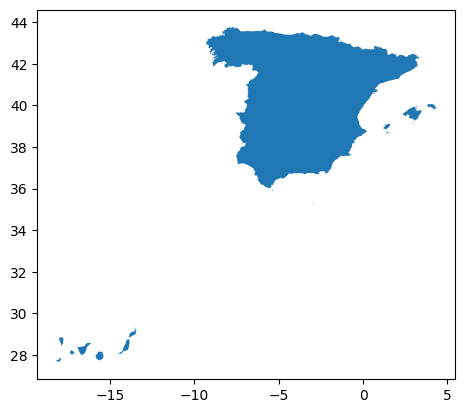

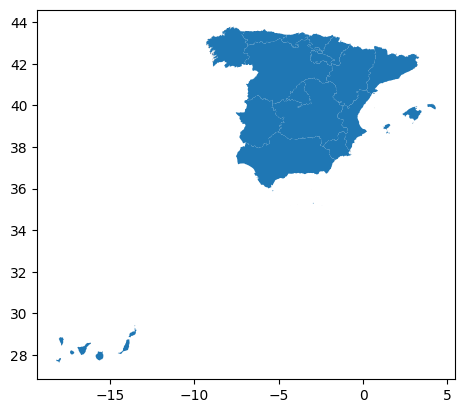

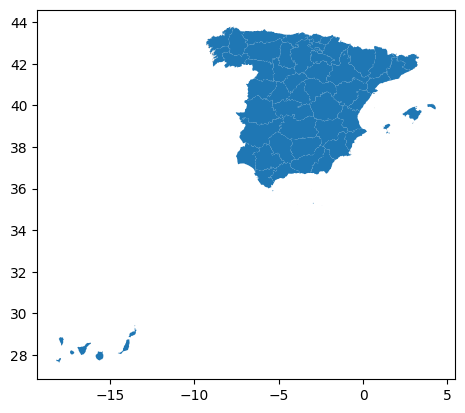

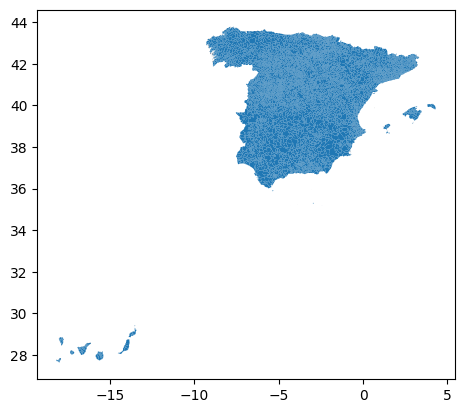

In [4]:
# plot shapefiles
shp_country.plot()
shp_autonomouscommunity.plot()
shp_province.plot()
shp_municipality.plot()

# plot crs projection
print(shp_country.crs)

In [5]:
shp_municipality['AUC_Code'] = shp_municipality['nationalCo'].apply(lambda x : str(x)[:4])
shp_municipality['Prov_Code'] = shp_municipality['nationalCo'].apply(lambda x : str(x)[:6])
shp_municipality.head()

,gml_id,nationalCo,localId,namespace,LocalisedC,language,sourceOfNa,pronunciat,text,script,transliter,residenceO,beginLifes,endLifespa,condominiu,administer,coAdminist,geometry,AUC_Code,Prov_Code
0,AU_ADMINISTRATIVEUNIT_34010404001,34010404001,34010404001,ES.IGN.BDDAE,Municipio,None,None,None,Abla,None,None,None,None,None,None,None,None,"POLYGON ((-2.78452 37.09350, -2.78410 37.09476...",3401,340104
1,AU_ADMINISTRATIVEUNIT_34010404002,34010404002,34010404002,ES.IGN.BDDAE,Municipio,None,None,None,Abrucena,None,None,None,None,None,None,None,None,"POLYGON ((-2.88985 37.09212, -2.88953 37.09249...",3401,340104
2,AU_ADMINISTRATIVEUNIT_34010404003,34010404003,34010404003,ES.IGN.BDDAE,Municipio,None,None,None,Adra,None,None,None,None,None,None,None,None,"POLYGON ((-3.14019 36.78779, -3.13982 36.78802...",3401,340104
3,AU_ADMINISTRATIVEUNIT_34010404004,34010404004,34010404004,ES.IGN.BDDAE,Municipio,None,None,None,Albanchez,None,None,None,None,None,None,None,None,"POLYGON ((-2.20218 37.31223, -2.20177 37.31227...",3401,340104
4,AU_ADMINISTRATIVEUNIT_34010404005,34010404005,34010404005,ES.IGN.BDDAE,Municipio,None,None,None,Alboloduy,None,None,None,None,None,None,None,None,"POLYGON ((-2.71288 37.07817, -2.71128 37.08034...",3401,340104


In [6]:
# Add code of Autonomous Community to the name of the Autonomous Community
shp_autonomouscommunity['AUC_Code'] = (shp_autonomouscommunity['nationalCo'].apply(lambda x : str(x)[:4])) + ':' + shp_autonomouscommunity['text']

# Add the values to a list
AUC_list = list(shp_autonomouscommunity['AUC_Code'].unique())

# Create a new list to enable the dictonary
new_list = []
for word in AUC_list:
    word = word.split(":")
    new_list.extend(word)

print(new_list)

# Create a function for the dictonary creation
def Convert(lst):
    res_dct = map(lambda i: (lst[i], lst[i+1]), range(len(lst)-1)[::2])
    print(res_dct)
    return dict(res_dct)
     
# Create dictonary
AUC_lst = Convert(new_list)
print(AUC_lst)

# Find Autonomous Community Code and Replace by Corresponding Name
shp_municipality['AUC_Code'] = shp_municipality['AUC_Code'].map(AUC_lst)


['3401', 'Andalucía', '3402', 'Aragón', '3403', 'Principado de Asturias', '3404', 'Illes Balears', '3405', 'Canarias', '3406', 'Cantabria', '3407', 'Castilla y León', '3408', 'Castilla-La Mancha', '3409', 'Cataluña/Catalunya', '3410', 'Comunitat Valenciana', '3411', 'Extremadura', '3412', 'Galicia', '3413', 'Comunidad de Madrid', '3414', 'Región de Murcia', '3415', 'Comunidad Foral de Navarra', '3416', 'País Vasco/Euskadi', '3417', 'La Rioja', '3418', 'Ciudad Autónoma de Ceuta', '3419', 'Ciudad Autónoma de Melilla', '3420', 'Territorio no asociado a ninguna autonomía']
{'3401': 'Andalucía', '3402': 'Aragón', '3403': 'Principado de Asturias', '3404': 'Illes Balears', '3405': 'Canarias', '3406': 'Cantabria', '3407': 'Castilla y León', '3408': 'Castilla-La Mancha', '3409': 'Cataluña/Catalunya', '3410': 'Comunitat Valenciana', '3411': 'Extremadura', '3412': 'Galicia', '3413': 'Comunidad de Madrid', '3414': 'Región de Murcia', '3415': 'Comunidad Foral de Navarra', '3416': 'País Vasco/Euskad

In [7]:
# Add code of Autonomous Community to the name of the Autonomous Community
shp_province['Prov_Code'] = shp_province['nationalCo'].apply(lambda x : str(x)[:6]) + ':' + shp_province['text']

# Add the values to a list
Prov_list = list(shp_province['Prov_Code'].unique())

# Create a new list to enable the dictonary
newlist = []
for word in Prov_list:
    word = word.split(":")
    newlist.extend(word)  

# Create a function for the dictonary creation
def Convert(lst):
    res_dct = map(lambda i: (lst[i], lst[i+1]), range(len(lst)-1)[::2])
    return dict(res_dct)
 
# Create dictonary
Prov_lst = Convert(newlist)
print(Prov_lst)

# Find Province Code and Replace by Corresponding Province Name
shp_municipality['Prov_Code'] = shp_municipality['Prov_Code'].map(Prov_lst)

{'341003': 'Alacant/Alicante', '340104': 'Almería', '340705': 'Ávila', '341106': 'Badajoz', '340407': 'Illes Balears', '340908': 'Barcelona', '340709': 'Burgos', '341110': 'Cáceres', '340111': 'Cádiz', '341012': 'Castelló/Castellón', '340813': 'Ciudad Real', '340114': 'Córdoba', '341215': 'A Coruña', '340816': 'Cuenca', '340917': 'Girona', '340118': 'Granada', '340819': 'Guadalajara', '341620': 'Gipuzkoa', '340121': 'Huelva', '340222': 'Huesca', '340123': 'Jaén', '340724': 'León', '340925': 'Lleida', '341726': 'La Rioja', '341227': 'Lugo', '341328': 'Madrid', '340129': 'Málaga', '341430': 'Murcia', '341531': 'Navarra', '341232': 'Ourense', '340333': 'Asturias', '340734': 'Palencia', '340535': 'Las Palmas', '341236': 'Pontevedra', '340737': 'Salamanca', '340538': 'Santa Cruz de Tenerife', '340639': 'Cantabria', '340740': 'Segovia', '340141': 'Sevilla', '340742': 'Soria', '340943': 'Tarragona', '340244': 'Teruel', '340845': 'Toledo', '341046': 'València/Valencia', '340747': 'Valladolid',

In [8]:
shp_municipality.head()

,gml_id,nationalCo,localId,namespace,LocalisedC,language,sourceOfNa,pronunciat,text,script,transliter,residenceO,beginLifes,endLifespa,condominiu,administer,coAdminist,geometry,AUC_Code,Prov_Code
0,AU_ADMINISTRATIVEUNIT_34010404001,34010404001,34010404001,ES.IGN.BDDAE,Municipio,None,None,None,Abla,None,None,None,None,None,None,None,None,"POLYGON ((-2.78452 37.09350, -2.78410 37.09476...",Andalucía,Almería
1,AU_ADMINISTRATIVEUNIT_34010404002,34010404002,34010404002,ES.IGN.BDDAE,Municipio,None,None,None,Abrucena,None,None,None,None,None,None,None,None,"POLYGON ((-2.88985 37.09212, -2.88953 37.09249...",Andalucía,Almería
2,AU_ADMINISTRATIVEUNIT_34010404003,34010404003,34010404003,ES.IGN.BDDAE,Municipio,None,None,None,Adra,None,None,None,None,None,None,None,None,"POLYGON ((-3.14019 36.78779, -3.13982 36.78802...",Andalucía,Almería
3,AU_ADMINISTRATIVEUNIT_34010404004,34010404004,34010404004,ES.IGN.BDDAE,Municipio,None,None,None,Albanchez,None,None,None,None,None,None,None,None,"POLYGON ((-2.20218 37.31223, -2.20177 37.31227...",Andalucía,Almería
4,AU_ADMINISTRATIVEUNIT_34010404005,34010404005,34010404005,ES.IGN.BDDAE,Municipio,None,None,None,Alboloduy,None,None,None,None,None,None,None,None,"POLYGON ((-2.71288 37.07817, -2.71128 37.08034...",Andalucía,Almería


In [9]:
# filter columns
shp_municipality = shp_municipality[[
 'text',
 'Prov_Code',
 'AUC_Code',
 'geometry']]

# create a dictionary
# key = old name
# value = new name
dict = {'text': 'Municipality',
        'Prov_Code': 'Province',
        'AUC_Code': 'Autonomous_Community',
        'geometry': 'geometry'}
 
# call rename () method
shp_municipality.rename(columns=dict,
          inplace=True)

shp_municipality

C:\Users\rensw\AppData\Local\Temp\ipykernel_12232\87363932.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shp_municipality.rename(columns=dict,


,Municipality,Province,Autonomous_Community,geometry
0,Abla,Almería,Andalucía,"POLYGON ((-2.78452 37.09350, -2.78410 37.09476..."
1,Abrucena,Almería,Andalucía,"POLYGON ((-2.88985 37.09212, -2.88953 37.09249..."
2,Adra,Almería,Andalucía,"POLYGON ((-3.14019 36.78779, -3.13982 36.78802..."
3,Albanchez,Almería,Andalucía,"POLYGON ((-2.20218 37.31223, -2.20177 37.31227..."
4,Alboloduy,Almería,Andalucía,"POLYGON ((-2.71288 37.07817, -2.71128 37.08034..."
...,...,...,...,...
8212,Isla del Perejil,Territorio no asociado a ninguna provincia,Territorio no asociado a ninguna autonomía,"POLYGON ((-5.41795 35.91194, -5.41826 35.91195..."
8213,Peñón de Vélez de la Gomera,Territorio no asociado a ninguna provincia,Territorio no asociado a ninguna autonomía,"POLYGON ((-4.29788 35.17045, -4.29786 35.17052..."
8214,Islas Chafarinas,Territorio no asociado a ninguna provincia,Territorio no asociado a ninguna autonomía,"MULTIPOLYGON (((-2.43882 35.17497, -2.43885 35..."
8215,Islas Alhucemas,Territorio no asociado a ninguna provincia,Territorio no asociado a ninguna autonomía,"MULTIPOLYGON (((-3.90166 35.21575, -3.90164 35..."


In [17]:
# Title case to all column names
shp_municipality['Municipality'] = shp_municipality['Municipality'].str.title()
shp_municipality['Province'] = shp_municipality['Province'].str.title()
shp_municipality['Autonomous_Community'] = shp_municipality['Autonomous_Community'].str.title()
shp_municipality.head()

,Municipality,Province,Autonomous_Community,geometry
0,Abla,Almería,Andalucía,"POLYGON ((-2.78452 37.09350, -2.78410 37.09476..."
1,Abrucena,Almería,Andalucía,"POLYGON ((-2.88985 37.09212, -2.88953 37.09249..."
2,Adra,Almería,Andalucía,"POLYGON ((-3.14019 36.78779, -3.13982 36.78802..."
3,Albanchez,Almería,Andalucía,"POLYGON ((-2.20218 37.31223, -2.20177 37.31227..."
4,Alboloduy,Almería,Andalucía,"POLYGON ((-2.71288 37.07817, -2.71128 37.08034..."


In [20]:
# exports the dataframe into shapefile file with
folder = 'interim'
file_name = 'AdministrativeBoundaries_Total_InterimData' 
date = datetime.now().strftime("%d%m%Y")
data_format = '.shp'

export_name = '/' + folder + '/' + file_name + '_' + date + data_format

shp_municipality.to_file(cwd + export_name)


C:\Users\rensw\AppData\Local\Temp\ipykernel_12232\3549165464.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shp_municipality.to_file(cwd + export_name)
